# Clustering a segmented defect point cloud using DBSCAN method

This notebook is to explore clustering analysis using DBSCAN method on a point cloud dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams

import sklearn
from sklearn.cluster import DBSCAN
from collections import Counter

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 13,10
# color theme: Red, Green, Blue, Cyan, Magenta, Yellow(dark khaki), Brown, Pink 
colors_theme = np.array(['r', 'g', 'b', 'c', 'm', 'y', 'brown', 'pink'])

# Reading the dataset

The dataset is a point cloud in csv file format an contains the defect segmented points. Every row represents a point with six features of xyz cordination and RGB color information.

In [3]:
de = pd.read_csv('C:/Users/umroot/Downloads/Jupiter Majid/Point cloud clustering/defect.csv')
de.head()

,X,Y,Z,R,G,B
0,0.019,0.032,0.022,144,145,131
1,0.018,0.019,0.089,90,72,60
2,0.391,0.035,0.107,97,102,79
3,0.267,0.047,0.153,130,137,129
4,0.266,0.047,0.136,117,118,110


# 3D and 2D visualization of the dataset

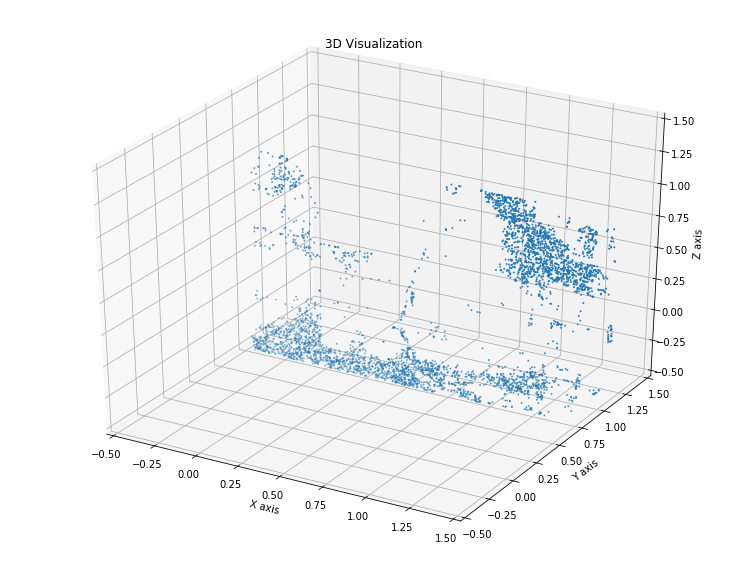

Text(0,0.5,'Z axis')

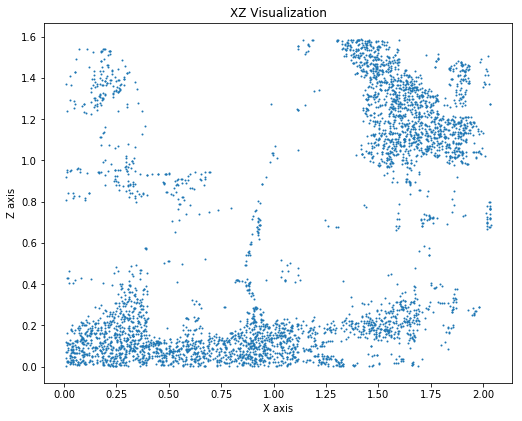

In [4]:
#3D Visualization.
fig = plt.figure()
ax1 = fig.add_subplot(111, projection = '3d')

#It is necessary to fix the axis limits in order to visualize the dataset in scale.
x_limit = ax1.get_xlim()
x_range = x_limit[1] - x_limit[0]
x_mid = np.mean(x_limit)

y_limit = ax1.get_ylim()
y_range = y_limit[1] - y_limit[0]
y_mid = np.mean(y_limit)

z_limit = ax1.get_zlim()
z_range = z_limit[1] - z_limit[0]
z_mid = np.mean(z_limit)

maximum_range = max([x_range, y_range, z_range])

ax1.set_xlim([x_mid - maximum_range, x_mid + maximum_range])
ax1.set_ylim([y_mid - maximum_range, y_mid + maximum_range])
ax1.set_zlim([z_mid - maximum_range, z_mid + maximum_range])
#colors = (de.R, de.G, de.B)
ax1.scatter(de.X, de.Y, de.Z, s=1)
ax1.set_title("3D Visualization")
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
plt.show()


# 2D visualization
fig = plt.figure()
ax2 = fig.add_axes([.1,.1,.5,.5])

ax2.scatter(de.X, de.Z, s=1)
ax2.set_title('XZ Visualization')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Z axis')

# Clustering the defects using DBSCAN method

In [ ]:
import math

def calculate_kn_distance(X,k):

    kn_distance = []
    for i in range(len(X.X)):
        eucl_dist = []
        for j in range(len(X.Z)):
            eucl_dist.append(
                math.sqrt(
                    ((X.X[i] - X.X[j]) ** 2) +
                    ((X.Z[i] - X.Z[j]) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance


eps_dist = calculate_kn_distance(de,4)
plt.hist(eps_dist,bins=30)
plt.ylabel('n');
plt.xlabel('Epsilon distance');

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=800, n_jobs=None, p=None)
Counter({0: 1853, 1: 1565, 2: 756})


Text(0.5,1,'DBSCAN')

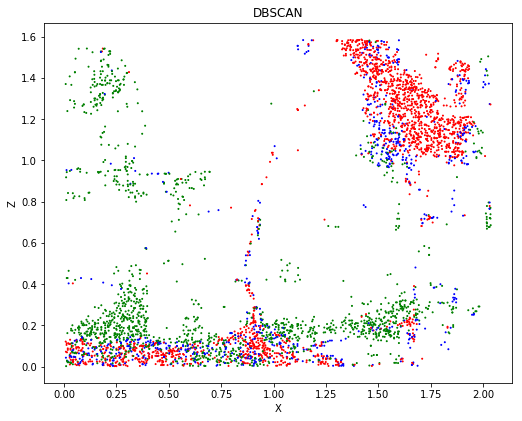

In [5]:
db = DBSCAN(eps=20, min_samples=800).fit(de)
print db
db.labels_ += 1
print Counter(db.labels_)

fig = plt.figure()

ax = fig.add_axes([.1,.1,.5,.5])

ax.scatter(de.X, de.Z, c = colors_theme[db.labels_], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Z')

plt.title('DBSCAN')

DBSCAN(algorithm='auto', eps=20, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=850, n_jobs=None, p=None)
Counter({0: 2749, 1: 1425})


Text(0.5,1,'DBSCAN')

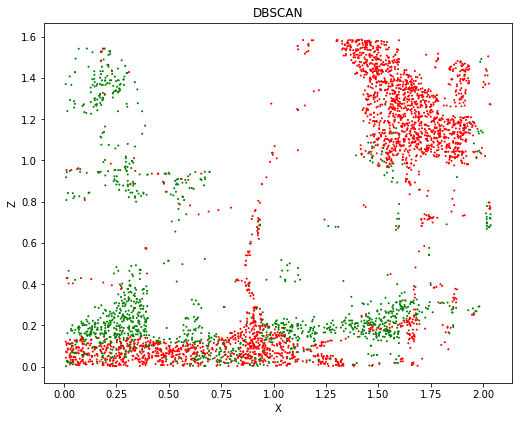

In [6]:
db = DBSCAN(eps=20, min_samples=850).fit(de)
print db
db.labels_ += 1
print Counter(db.labels_)

fig = plt.figure()

ax = fig.add_axes([.1,.1,.5,.5])

ax.scatter(de.X, de.Z, c = colors_theme[db.labels_], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Z')

plt.title('DBSCAN')

DBSCAN(algorithm='auto', eps=0.3, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=20, n_jobs=None, p=None)
Counter({0: 4174})


Text(0.5,1,'DBSCAN')

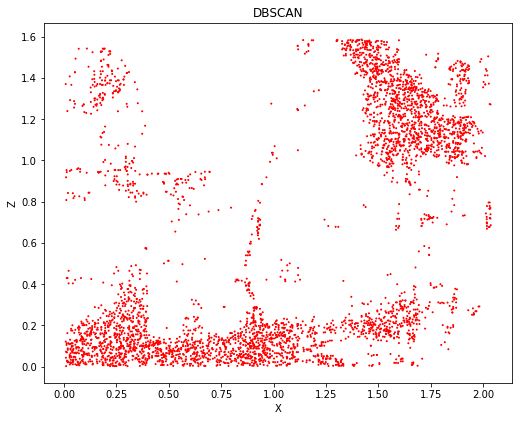

In [75]:
db = DBSCAN(eps=.3, min_samples=20).fit(de)
print db
db.labels_ += 1
print Counter(db.labels_)

fig = plt.figure()

ax = fig.add_axes([.1,.1,.5,.5])

ax.scatter(de.X, de.Z, c = colors_theme[db.labels_], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Z')

plt.title('DBSCAN')

In [54]:
from sklearn.neighbors import NearestNeighbors
X = [de.X, de.Z]
nbrs = NearestNeighbors(n_neighbors=3).fit(de)
distances, indices = nbrs.kneighbors(de)
distances

array([[0.        , 0.        , 1.44383136],
       [0.        , 2.38310155, 2.39699583],
       [0.        , 0.        , 1.73300721],
       ...,
       [0.        , 1.83355311, 2.74274115],
       [0.        , 3.12043042, 3.98695134],
       [0.        , 3.99709144, 4.6323086 ]])

In [55]:
distances.mean()

1.6071847507364083